In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [8]:
## COMBINE SHARDS

mem_shards = [0,1,2,3,4,5,6,7,8]

mem_scores_df = pd.DataFrame()
for _shard in mem_shards:
    _df = pd.read_csv("saved_shards/mem_prompts/reid_scores_mem_prompts_shard_{}.csv".format(_shard))
    mem_scores_df = pd.concat([mem_scores_df, _df])

non_mem_shards = [0,1,2,3]
non_mem_scores_df = pd.DataFrame()
for _shard in non_mem_shards:
    _df = pd.read_csv("saved_shards/non_mem_prompts/reid_scores_non_mem_prompts_shard_{}.csv".format(_shard))
    non_mem_scores_df = pd.concat([non_mem_scores_df, _df])

In [ ]:
print(len(mem_scores_df))
mem_scores_df = mem_scores_df.drop_duplicates(subset='Real Path').reset_index(drop=True)
print(len(mem_scores_df))

In [ ]:
print(len(non_mem_scores_df))
non_mem_scores_df = non_mem_scores_df.drop_duplicates(subset='Real Path').reset_index(drop=True)
print(len(non_mem_scores_df))

In [ ]:
# Save CSVs
mem_scores_df.to_csv("saved_shards/combined_mem_scores.csv", index=False)
non_mem_scores_df.to_csv("saved_shards/combined_non_mem_scores.csv", index=False)

len(mem_scores_df), len(non_mem_scores_df)

In [11]:
# Equalize the counts of both dfs

mem_scores_df = mem_scores_df.sample(len(non_mem_scores_df)).reset_index(drop=True)

In [ ]:
mem_scores_df.head(3)

In [ ]:
# Create three subplots in one row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the distribution for 'subset1'
sns.histplot(mem_scores_df['Pixel_distance'], kde=True, ax=axes[0], label="Mem Prompts")
sns.histplot(non_mem_scores_df['Pixel_distance'], kde=True, ax=axes[0], label="Non Mem Prompts")
axes[0].set_title('Distance in Pixel Space')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()


# Plot the distribution for 'subset2'
sns.histplot(mem_scores_df['Latext_distance'], kde=True, ax=axes[1], label="Mem Prompts")
sns.histplot(non_mem_scores_df['Latext_distance'], kde=True, ax=axes[1], label="Non Mem Prompts")
axes[1].set_title('Distance in Latent Space')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()


# Plot the distribution for 'subset3'
sns.histplot(mem_scores_df['reid_scores'], kde=True, ax=axes[2], label="Mem Prompts")
sns.histplot(mem_scores_df['reid_scores'], kde=True, ax=axes[2], label="Non Mem Prompts")
axes[2].set_title('Re-Identification Scores')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()


# Adjust layout to prevent overlapping
plt.tight_layout()

# plt.legend()

# Display the plots
plt.show()

In [ ]:
# Create three subplots in one row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the distribution for 'subset1'
sns.boxplot(mem_scores_df['Pixel_distance'], ax=axes[0], )
sns.boxplot(non_mem_scores_df['Pixel_distance'], ax=axes[0],)
axes[0].set_title('Distance in Pixel Space')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()


# Plot the distribution for 'subset2'
sns.boxplot(mem_scores_df['Latext_distance'], ax=axes[1], )
sns.boxplot(non_mem_scores_df['Latext_distance'], ax=axes[1],)
axes[1].set_title('Distance in Latent Space')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()


# Plot the distribution for 'subset3'
sns.boxplot(mem_scores_df['reid_scores'], ax=axes[2], )
sns.boxplot(mem_scores_df['reid_scores'], ax=axes[2],)
axes[2].set_title('Re-Identification Scores')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()


# Adjust layout to prevent overlapping
plt.tight_layout()

# plt.legend()

# Display the plots
plt.show()

## Inspecting the Images and Generations with highest scores

In [13]:
mem_scores_df = pd.read_csv("saved_shards/combined_mem_scores.csv")
non_mem_scores_df = pd.read_csv("saved_shards/combined_non_mem_scores.csv")

In [4]:
mem_scores_df = mem_scores_df.sort_values(by='Latext_distance', ascending=True).reset_index(drop=False)

In [3]:
mem_scores_df.columns

Index(['Real Path', 'Prompt', 'reid_scores', 'Pixel_distance',
       'Latext_distance'],
      dtype='object')

In [5]:
# 1. Images from memorized prompts with the least distance in latent space and corresponding prompts

print(mem_scores_df['Latext_distance'].min())

real_image_paths = []

# Printing the corresponding prompts
for i in range(len(mem_scores_df)):
    if(i == 10):
        break

    _prompt = mem_scores_df['Prompt'][i]
    latent_dist = mem_scores_df['Latext_distance'][i]
    real_image_paths.append(mem_scores_df['Real Path'][i])
    # real_image = Image.open()
    print(mem_scores_df['Real Path'][i].split("/")[-1])
    print("#### PROMPT: ")
    print(_prompt, latent_dist)
    print("\n")

0.2501899999999999
156f92a9-01819685-ac94651e-817ba247-b25e37a4.jpg
#### PROMPT: 
Unchanged position of the ___ tube.  The right internal jugular vein
 catheter still shows on unusual course, being directed towards the aortic knob
 and potentially position in the brachiocephalic vein.  Moderate cardiomegaly. 
 Bilateral areas of basilar atelectasis. 0.2501899999999999


192a0cc8-54d8093f-80ca9183-011b1430-415d03df.jpg
#### PROMPT: 
In comparison with the study of ___, the final image shows the Dobhoff
 tube coiled within the upper stomach.  Striking elevation of the left
 hemidiaphragmatic contour.  No definite acute pneumonia on this limited study. 0.31637


691a8008-c9317e62-161b790f-c4a7972f-5c95029f.jpg
#### PROMPT: 
Serial images demonstrates advancement of the Dobbhoff tube with the distal
 tip within the body of the stomach on the last image. There remains bilateral
 pleural effusions, left greater than right. No pneumothoraces are seen.  There
 is unchanged mild cardiomegaly. 0

In [6]:
# Inspecting generations for the real images

real_images = []
results_dict = {}

for _path in real_image_paths:
    # real_image = Image.open(_path)
    filename = _path.split('/')[-1]
    generations = []
    for j in range(5):
        gen_filename = 'Output/Generated_Images/mem_prompts/' + filename.strip(".jpg") + '_gen_{}.jpg'.format(j)
        generations.append(Image.open(gen_filename))

    results_dict[_path] = generations

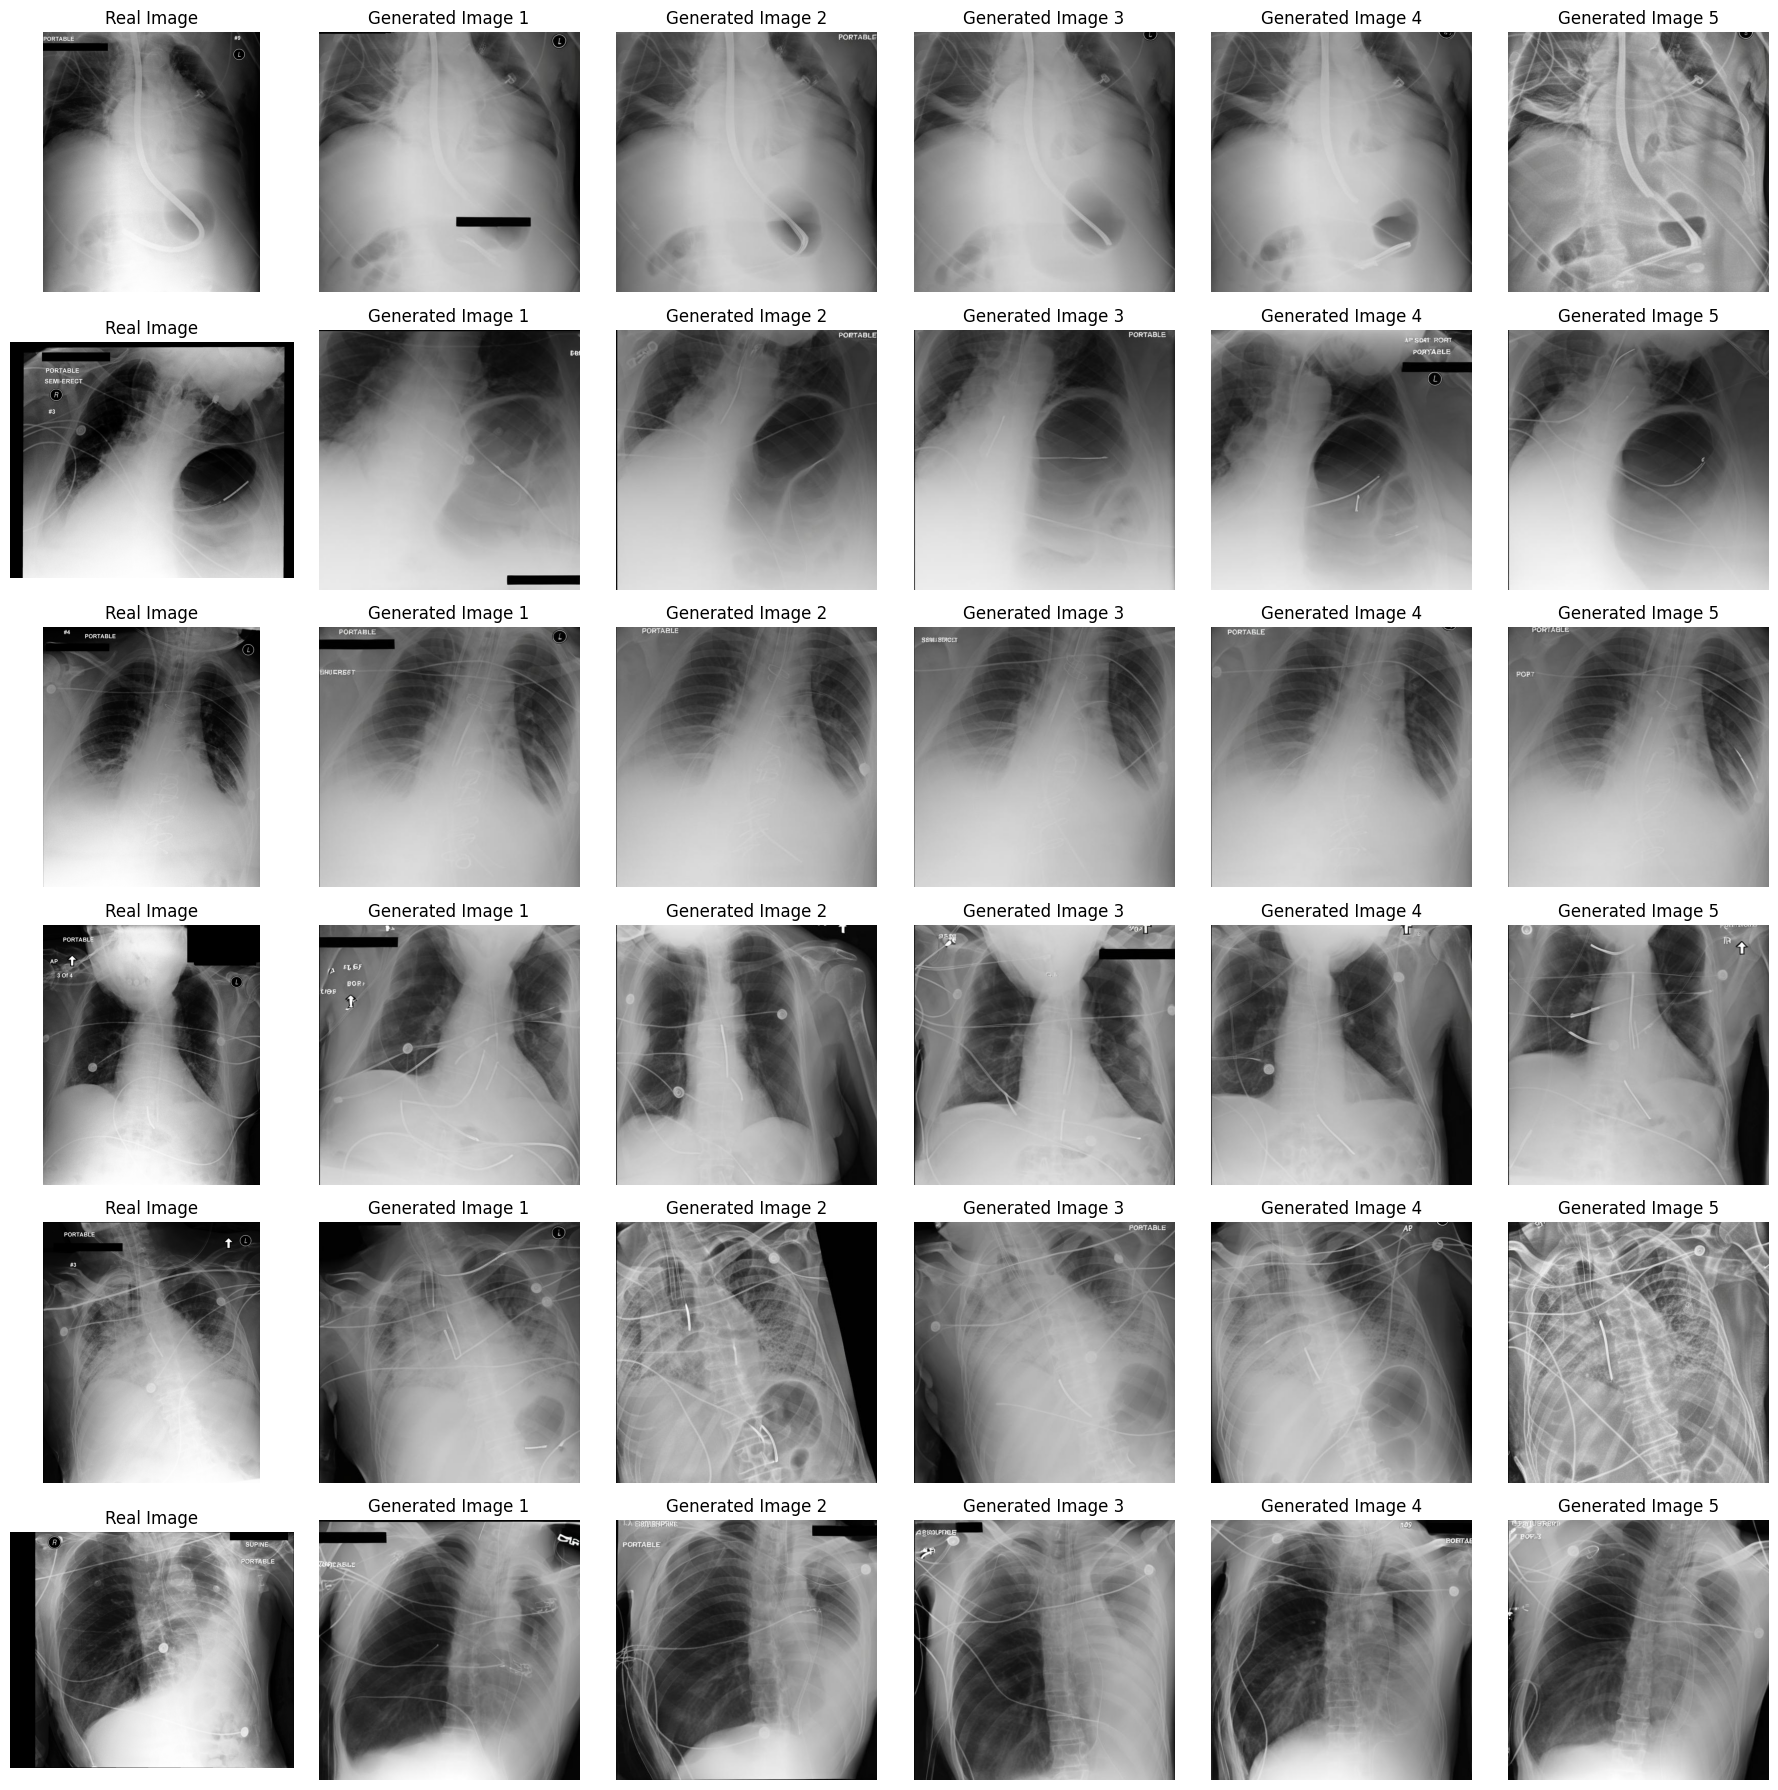

In [7]:
my_dict = results_dict

simulated_key_images = { key: Image.open(key).convert("RGB") for key in my_dict.keys() }

num_rows = len(my_dict)
num_cols = max(1 + len(images) for images in my_dict.values())

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

for row_index, (key, image_list) in enumerate(my_dict.items()):
    # Load the key image (here we use our simulated image; replace with Image.open(key) if needed)
    key_image = simulated_key_images[key]
    
    # Plot the key image in the first column.
    axes[row_index, 0].imshow(key_image)
    axes[row_index, 0].axis("off")
    axes[row_index, 0].set_title("Real Image")
    
    # Plot each image from the list in subsequent columns.
    for j, img in enumerate(image_list):
        col_index = j + 1  # start at column 1
        axes[row_index, col_index].imshow(img)
        axes[row_index, col_index].axis("off")
        axes[row_index, col_index].set_title(f"Generated Image {j+1}")
    
    # If there are extra columns in this row, hide them.
    for col in range(1 + len(image_list), num_cols):
        axes[row_index, col].axis("off")

plt.tight_layout()
plt.show()

## Non-Memorized Prompts

In [14]:
non_mem_scores_df = non_mem_scores_df.sort_values(by='Latext_distance', ascending=True).reset_index(drop=False)
non_mem_scores_df2 = non_mem_scores_df.sort_values(by='Pixel_distance', ascending=True).reset_index(drop=False)

In [15]:
print(non_mem_scores_df['Latext_distance'].min())

real_image_paths = []

# Printing the corresponding prompts
for i in range(len(non_mem_scores_df)):
    if(i == 6):
        break

    _prompt = non_mem_scores_df2['Prompt'][i]
    latent_dist = non_mem_scores_df['Latext_distance'][i]
    real_image_paths.append(non_mem_scores_df['Real Path'][i])
    # real_image = Image.open()
    print(non_mem_scores_df['Real Path'][i].split("/")[-1])
    print("#### PROMPT: ")
    print(_prompt, latent_dist)
    print("\n")

0.4989899999999999
6c9319dc-f2b33d0c-0c63b36d-ad7b5de1-67e2afd4.jpg
#### PROMPT: 
Right PICC line is at the level of superior mid SVC.  Cardiomegaly, to
 replaced valves, and mediastinal contour are stable.  Left pleural effusion
 has increased in the interim.  There is mild interstitial edema.  Small amount
 of right pleural effusion is present.  There is no pneumothorax. 0.4989899999999999


7bd0fc1e-68b88b39-3ead959d-c938c11a-3dbdd97f.jpg
#### PROMPT: 
Bilateral pleural effusions with bibasilar atelectasis, similar
 compared to prior exam. 0.5197299999999999


fef1901d-1daf0136-bc7b8269-190c589f-1304b234.jpg
#### PROMPT: 
Heart size is normal.  Left perihilar consolidation and right mid lung opacity
 up persistent but there is minimal interval improvement in the overall
 opacities as compared to previous study.  The right linear oblique opacity has
 small O element of atelectasis.  There is no pleural effusion.  There is no
 appreciable pneumothorax. 0.52542


f131b9aa-c974e6ab-e534

#### Observation: The prompts in the non-memorized set do not contain the de-identification token

In [10]:
# Inspecting generations for the real images

real_images = []
results_dict = {}

for _path in real_image_paths:
    # real_image = Image.open(_path)
    filename = _path.split('/')[-1]
    generations = []
    for j in range(5):
        gen_filename = 'Output/Generated_Images/non_mem_prompts/' + filename.strip(".jpg") + '_gen_{}.jpg'.format(j)
        generations.append(Image.open(gen_filename))

    results_dict[_path] = generations

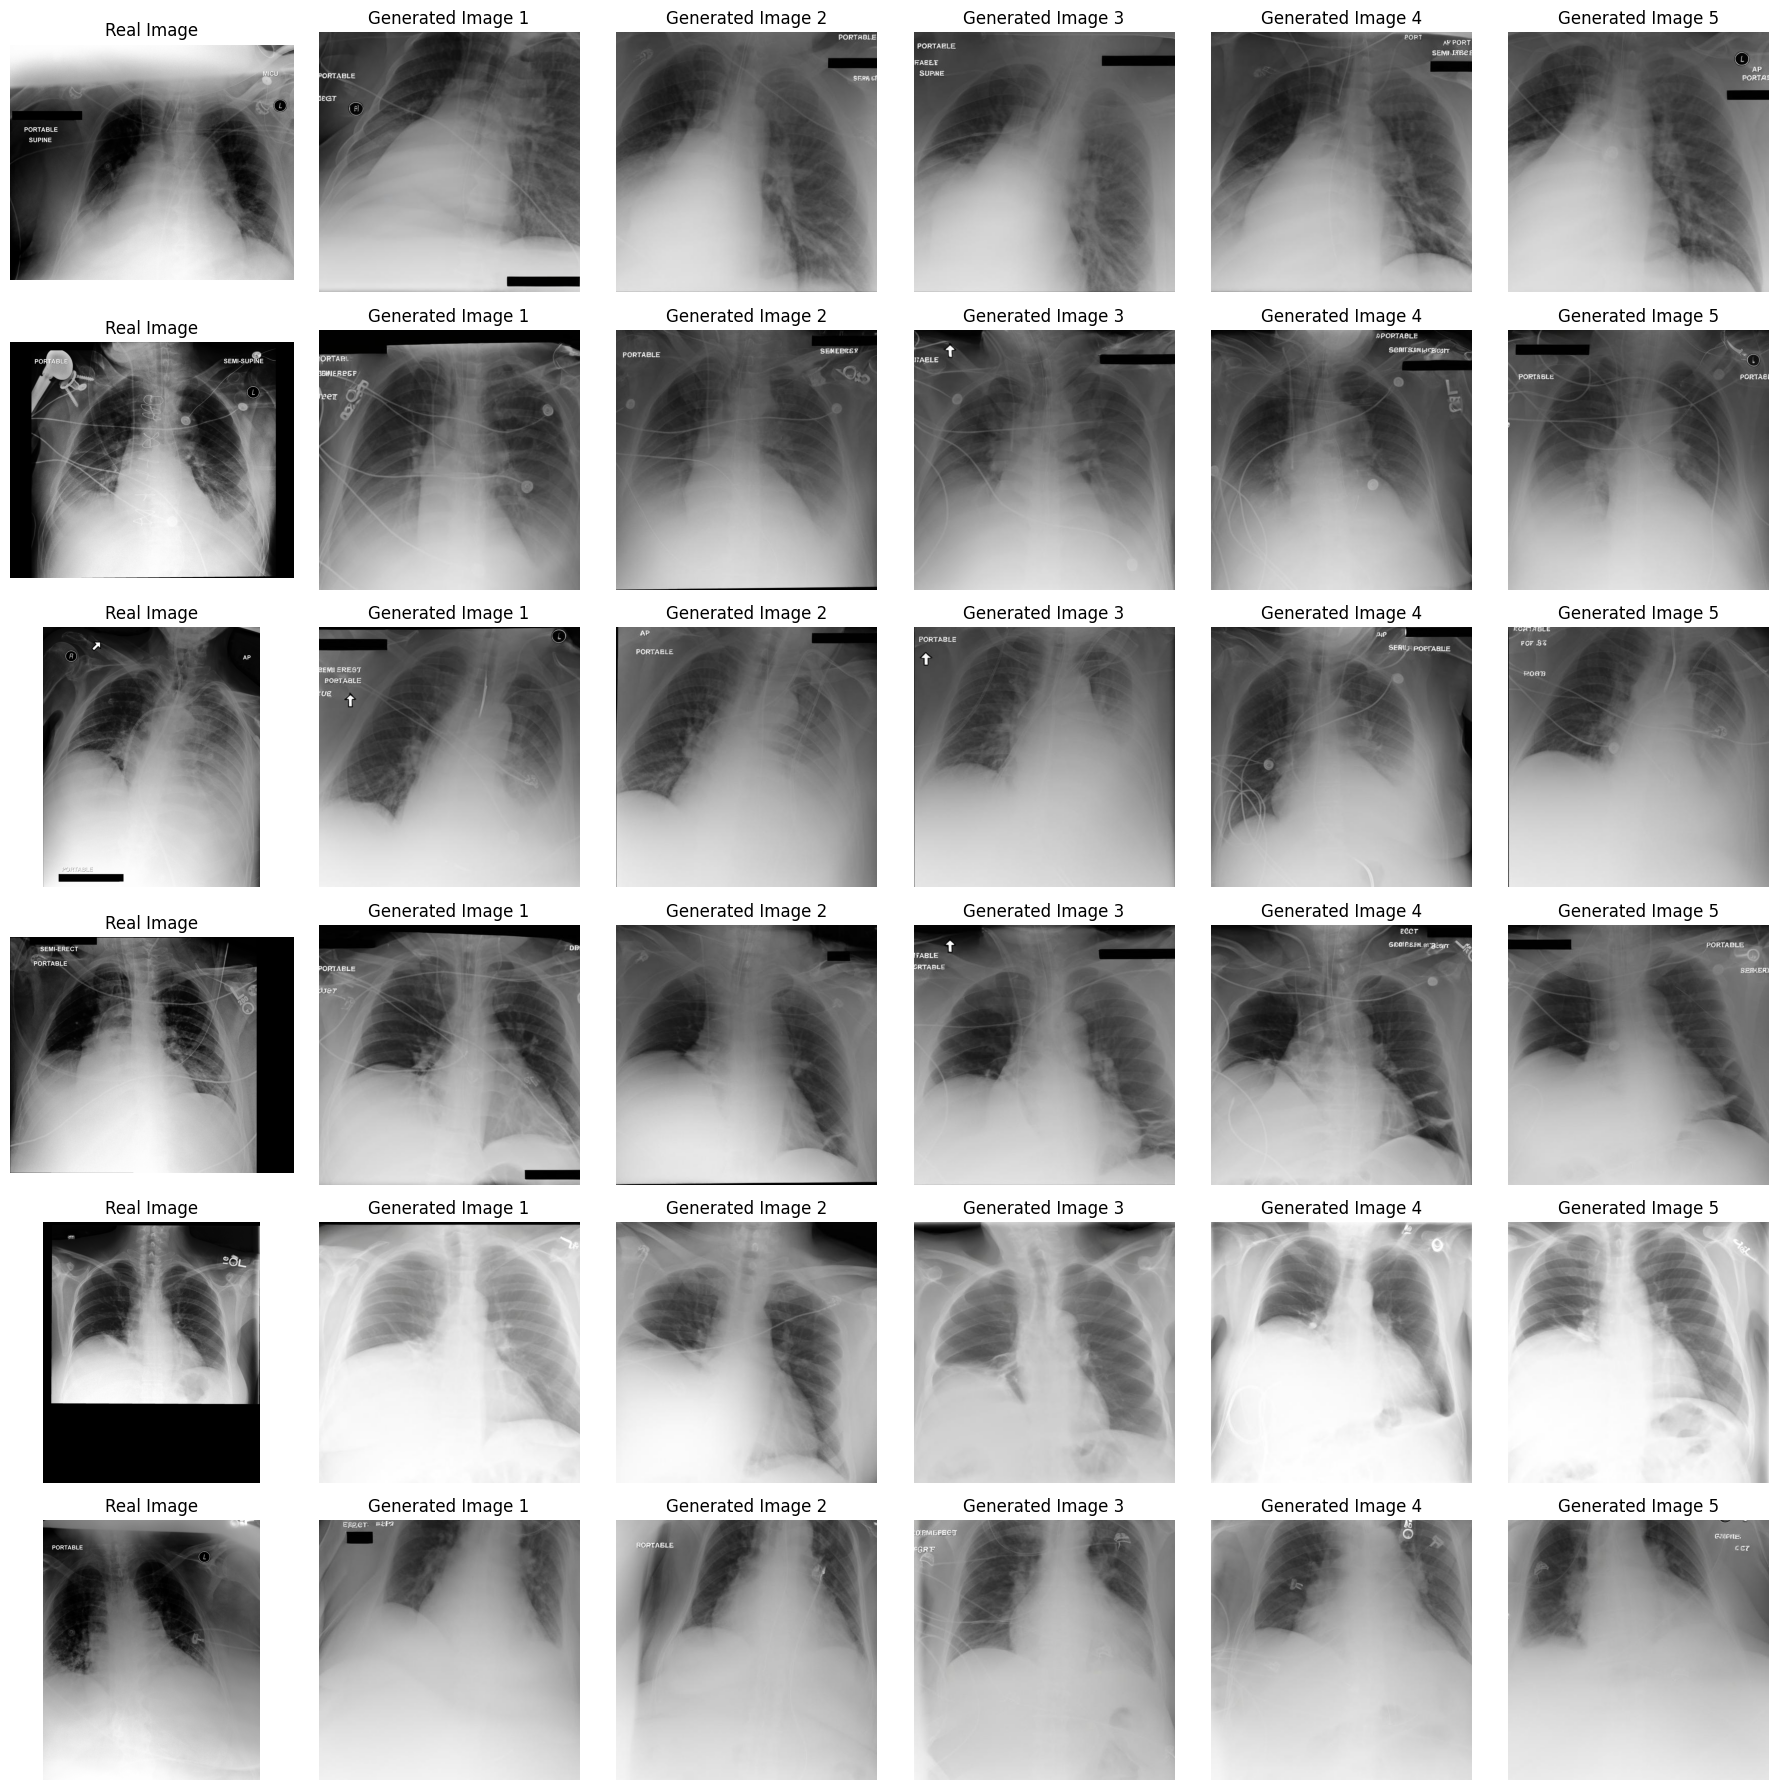

In [11]:
my_dict = results_dict

simulated_key_images = { key: Image.open(key).convert("RGB") for key in my_dict.keys() }

num_rows = len(my_dict)
num_cols = max(1 + len(images) for images in my_dict.values())

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))

for row_index, (key, image_list) in enumerate(my_dict.items()):
    # Load the key image (here we use our simulated image; replace with Image.open(key) if needed)
    key_image = simulated_key_images[key]
    
    # Plot the key image in the first column.
    axes[row_index, 0].imshow(key_image)
    axes[row_index, 0].axis("off")
    axes[row_index, 0].set_title("Real Image")
    
    # Plot each image from the list in subsequent columns.
    for j, img in enumerate(image_list):
        col_index = j + 1  # start at column 1
        axes[row_index, col_index].imshow(img)
        axes[row_index, col_index].axis("off")
        axes[row_index, col_index].set_title(f"Generated Image {j+1}")
    
    # If there are extra columns in this row, hide them.
    for col in range(1 + len(image_list), num_cols):
        axes[row_index, col].axis("off")

plt.tight_layout()
plt.show()